In [1]:
#from sklearn.ensemble import RandomForestRegressor
import numpy as np
import anndata
import sys, os
import pandas as pd
import stereosite

In [2]:
# Read gene expression matrix and transform it to anndata by gem2anndata() function. If cell mask file was given, use gem_with_cellmask_2anndata() function
# to transfer gem to anndata in single-cell resolution

from stereosite.read.gem import Gem_Reader
gem_file = "./data/SS200000681TL_A1.tissue.gem.gz"
mask_file = "./data/SS200000681TL_A1_mask.tif"
gem_reader = Gem_Reader(gem_file)
adata = gem_reader.gem_with_cellmask_2anndata(mask_file)
adata

/ldfssz1/ST_BIGDATA/USER/liuxing2/project/clinical/software/StereoSiTE/stereosite/read/gem.py:142: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X = expMtx, obs = obs, var = var)
/home/liuxing2/.conda/envs/liuxing2_r4/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/ldfssz1/ST_BIGDATA/USER/liuxing2/project/clinical/software/StereoSiTE/stereosite/read/gem.py:147: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  spatialdf[self.cell_label_key].cat.reorder_categories(cells, in

AnnData object with n_obs × n_vars = 220340 × 19919
    obsm: 'spatial'

In [9]:
from stereosite.read.gem import Gem_Reader
gem_file = "./data/SS200000681TL_A1.tissue.gem.gz"
gem_reader = Gem_Reader(gem_file)
adata = gem_reader.gem2anndata(200)
adata

/ldfssz1/ST_BIGDATA/USER/liuxing2/project/clinical/software/StereoSiTE/stereosite/read/gem.py:112: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(X = expMtx, obs = obs, var = var)
/home/liuxing2/.conda/envs/liuxing2_r4/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 4683 × 22422
    obs: 'x', 'y'
    obsm: 'spatial'

In [10]:
adata.write("./data/SS200000681TL_A1_bin200.h5ad")

In [13]:
from stereosite.cn.deconvolution import Cell2location
ref_file = "./data/inf_aver_noCAF.csv"
adata_file = "./data/SS200000681TL_A1_bin200.h5ad"
out_dir = "./data/deconvolution"
cell2loc = Cell2location(ref_file, adata_file, out_dir = out_dir, bin_size = 200, gpu = False)

In [ ]:
inf_aver = pd.read_csv(ref_file, index_col=0)
adata_vis = cell2loc.process_vis(inf_aver, max_epochs=50)
#cell2loc.run_deconvolution()

Anndata setup with scvi-tools version 0.19.0.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │   1   │
│         n_cells          │ 4683  │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 10498 │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    ind_x     │   adata.obs['_indices']   │
│    labels    │ adata.obs['_scvi_labels'] │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/liuxing2/.conda/envs/liuxing2_r4/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1767: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=8)`.
  category=PossibleUserWarning,
/home/liuxing2/.conda/envs/liuxing2_r4/lib/python3.7/site-packages/pytorch_lightning/trainer/configuration_validator.py:105: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
/home/liuxing2/.conda/envs/liuxing2_r4/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1896: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value f

Epoch 50/50: 100%|██████████████████████████████████████████████████████████████████████████████████████████| 50/50 [03:12<00:00,  3.61s/it, v_num=1, elbo_train=6.74e+7]

`Trainer.fit` stopped: `max_epochs=50` reached.


Sampling local variables, batch:   0%|                                                                                                             | 0/1 [00:00<?, ?it/s]

In [6]:
from stereosite.cn.cellneighbor import cn_deconvolve
adata_file = "./data/SS200000681TL_A1_bin200_sp.h5ad"
adata = anndata.read(adata_file)
cn_deconvolve(adata)

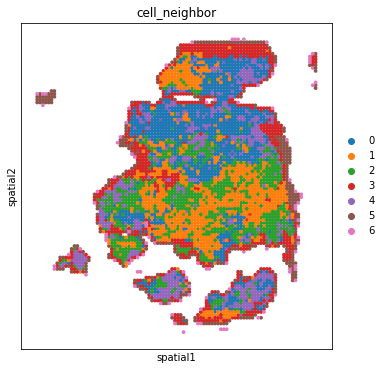

In [7]:
from stereosite.plot.cellneighbor import umap, heatmap, spatial
spatial(adata, spot_size = 200)

In [2]:
#load the data with deconvolution result
adata_file = "./data/SS200000681TL_A1_sp.h5ad"
adata = anndata.read(adata_file)
from stereosite.cn.cellneighbor import cn_cellbin
cn_cellbin(adata, 400, n_neighbors = 20, resolution = 0.4, min_dist = 0.1)

2023-07-19 09:43:34.338599: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 09:44:03.144915: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /ldfssz1/ST_BIGDATA/USER/liuxing2/lib/htslib-1.9/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib_os7/opencv-4.5.1/lib64:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib/mpfr-4.0.2/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib/gmp-6.1.2/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib/mpc-1.1.0/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib/bzip2-1.0.6/lib:/ldfssz1/ST_BIGDATA/USER/liuxing2/lib_os7/geos-3.10.2/lib64:/ldfssz1/ST_BIGD

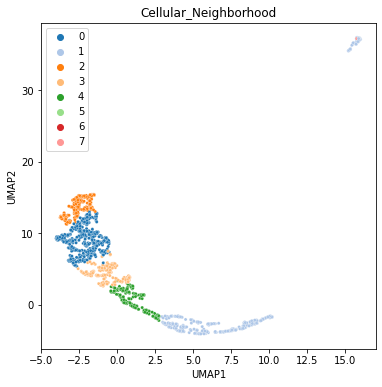

In [3]:
from stereosite.plot.cellneighbor import umap, heatmap, spatial
umap(adata)

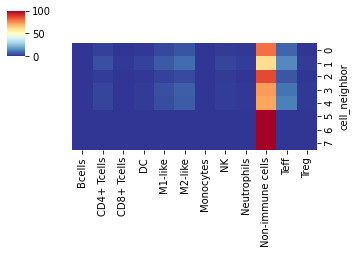

In [4]:
heatmap(adata)

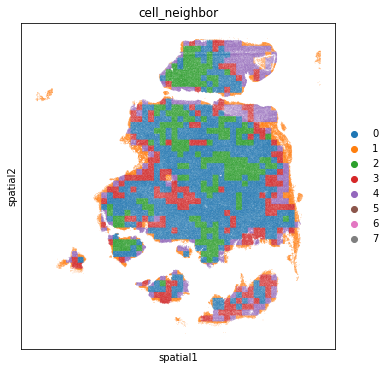

In [5]:
spatial(adata, spot_size = 20)

In [ ]:
from stereosite.scii import intensities_count
interactiondb_file = "/hwfssz5/ST_BIOINTEL/P22Z10200N0618/liuxing2/clinical/database/CellChat/CellChatDB.mouse.csv"
scii_dict = intensities_count(adata, interactiondb_file, distance_threshold = 50, anno = 'cell2loc_anno')

  0%|          | 0/1000 [00:00<?, ?/s]

  0%|          | 0/1764 [00:00<?, ?it/s]

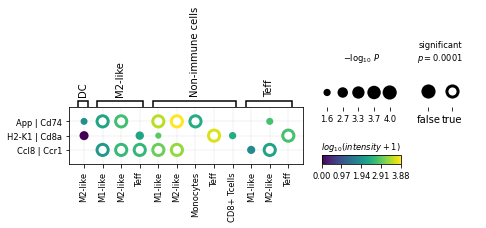

In [3]:
from stereosite.plot.scii import ligrec
import numpy as np
import pandas as pd
intensity =  scii_dict['intensities']
pvalues = scii_dict['pvalues']
index = [('App', 'Cd74'), ('H2-K1', 'Cd8a'), ('Ccl8', 'Ccr1')]
plot_data = {'intensities': intensity.loc[index],
            'pvalues': pvalues.loc[index]}
ligrec(plot_data,
        intensities_range=(50, np.inf),
        pvalue_threshold=0.05,
        alpha=1e-4,
        swap_axes=False,
        source_groups=["Non-immune cells", "M2-like", 'DC', 'Teff'],
        target_groups = ["M1-like", "M2-like", "Monocytes", "Teff", "CD8+ Tcells"],
        #target_groups=["Teff", "M1-like", "M2-like", "CD4+ Tcells", "CD8+ Tcells", "Monocytes", "Treg", "Bcells", "DC", "Neutrophils", "NK"],
        #remove_nonsig_interactions=True,
        title=" ",
)

4755

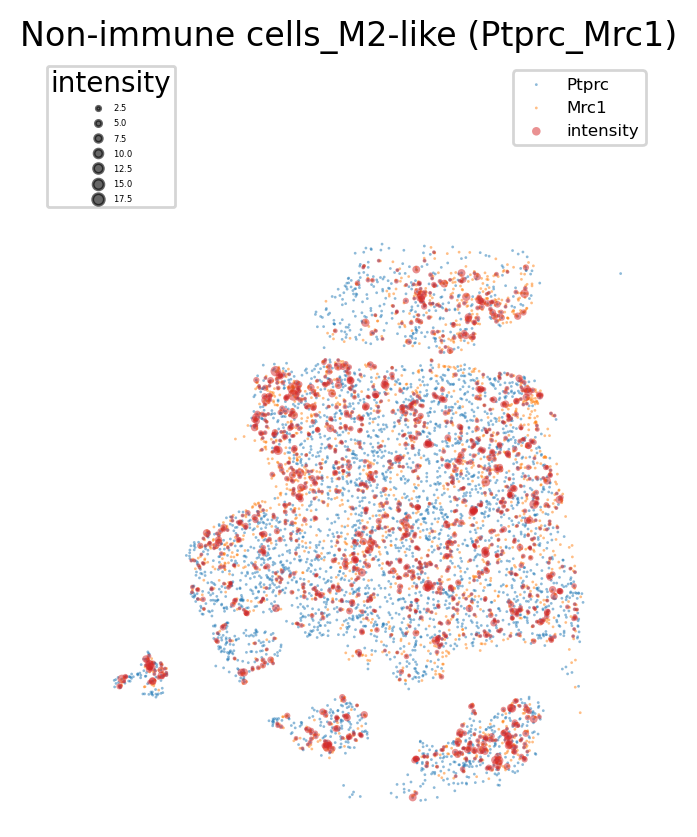

In [5]:
from stereosite.plot.intensity import intensity_insitu
cells = ['Non-immune cells', 'M2-like']
genes = ['Ptprc', 'Mrc1']
intensity_insitu(adata, cells, genes, radius = 50)